<a href="https://colab.research.google.com/github/jiaquantan/FYP1/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data Preprocessing***


# Step 1: Import Necessary Libraries


In [1]:
import pandas as pd
import numpy as np

# For plotting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# For randomly reorder the data
from sklearn.utils import shuffle

# For Dataset Balancing
from imblearn.over_sampling import SMOTE

# For Data Splitting
from sklearn.model_selection import train_test_split

# Machine Learning Model Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, classification_report, confusion_matrix

# Step 2: Load & Label Datasets


In [2]:
# load datasets
normal_traffic = pd.read_csv('Normal_data.csv')
malicious_traffic1 = pd.read_csv('metasploitable-2.csv')
malicious_traffic2 = pd.read_csv('OVS.csv')

# label datasets
normal_traffic['Label'] = 0  # Normal traffic
malicious_traffic1['Label'] = 1  # Malicious traffic
malicious_traffic2['Label'] = 1  # Malicious traffic

# Step 3: Combine the datasets

Combine all datasets into a single DataFrame

In [3]:
data = pd.concat([normal_traffic, malicious_traffic1, malicious_traffic2], ignore_index=True)

# Step 4: Data Cleaning & Handling



In [4]:
# Remove unmeasurable features
irrelevant_features = ['Flow ID','Src IP','Src Port','Dst IP','Dst Port','Timestamp']
data = data.drop(columns=[col for col in irrelevant_features if col in data.columns])

print("Remaining features:\n", data.columns)

num_features = len(data.columns)
print("Total number of remaining features:", num_features)

Remaining features:
 Index(['Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fw

In [5]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Fill or drop missing values
data.fillna(data.median(), inplace=True)  # Replace missing values with median

Missing values per column:
Protocol           0
Flow Duration      0
Tot Fwd Pkts       0
Tot Bwd Pkts       0
TotLen Fwd Pkts    0
                  ..
Idle Mean          0
Idle Std           0
Idle Max           0
Idle Min           0
Label              0
Length: 78, dtype: int64


In [6]:
#Check for non-numeric features & values
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Convert categorical features if necessary
# If there are any categorical columns/non-numeric columns, convert them to numeric using get_dummies
if len(non_numeric_columns) > 0:
    data = pd.get_dummies(data, drop_first=True)

Non-numeric columns: Index([], dtype='object')


### Experimental: Exploratory Data Analysis(EDA)

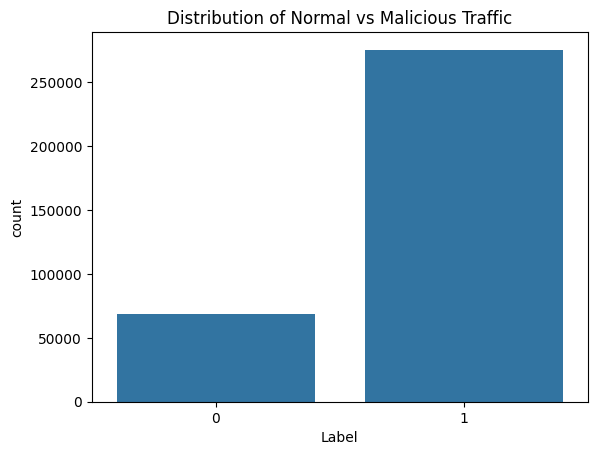

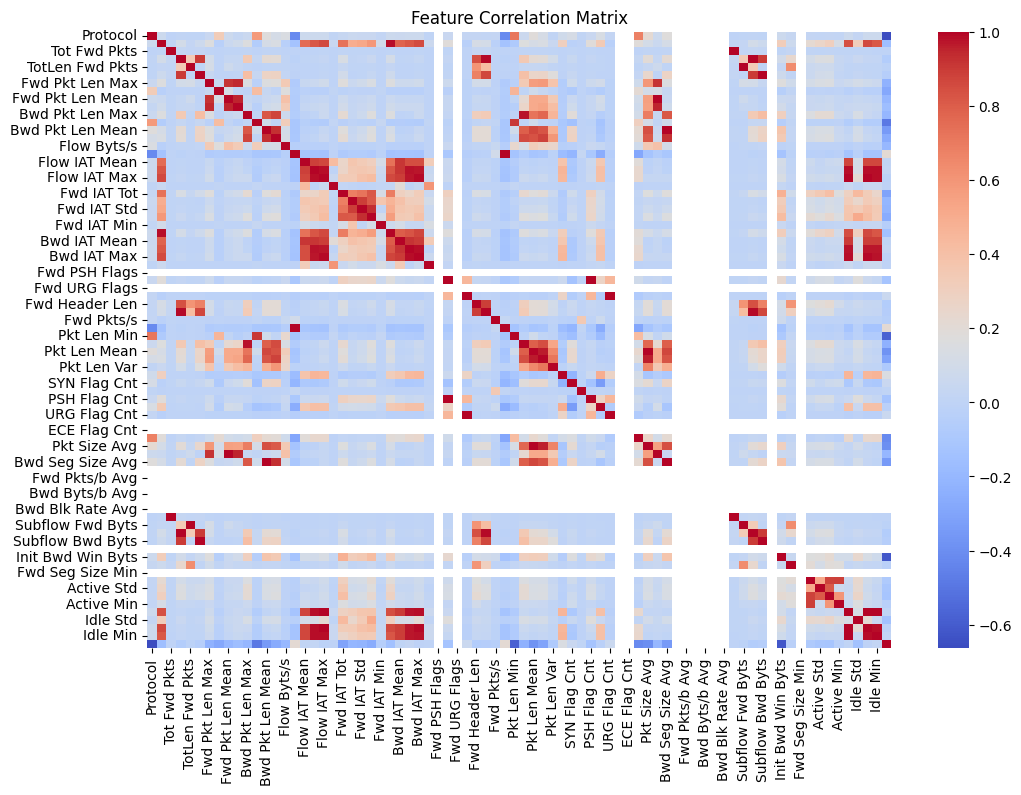

In [7]:
# Distribution of traffic labels
sns.countplot(x='Label', data=data)
plt.title('Distribution of Normal vs Malicious Traffic')
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

# Step 5: Shuffle the data


In [8]:
# To prevent bias, improve generalization & model performance
data = shuffle(data, random_state=42)

In [ ]:
# For checking purpose
# data.to_csv("preprocessed_data.csv", index=False)

# Step 6: Separate features (X) and target (y)

In [9]:
X = data.drop(columns=['Label']) # Drop the 'label' (target column)
y = data['Label']

print("Data preprocessing complete!")

Data preprocessing complete!


In [10]:
#For checking purpose
print(X)
print(y)

data.to_csv("preprocessed_data.csv", index=False)

        Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
69892          0             14             0             2                0   
166301         6       61291433             3             7               30   
260849         6         312260             3             6              708   
306912         6          20015             2             5              270   
145052         6              7             0             2                0   
...          ...            ...           ...           ...              ...   
119879         0             20             0             2                0   
259178         6          43465             2             6              307   
131932         0             14             0             2                0   
146867         6              7             0             2                0   
121958         0             11             0             2                0   

        TotLen Bwd Pkts  Fwd Pkt Len Ma

# Step 7: Dataset Balancing
* Check for class imbalances in the Label column after combining datasets.
* Using techniques like Synthetic Minority Oversampling Technique (SMOTE) to oversample minority classes if imbalances exist.
* This will improve the model's ability to generalize across classes.

In [11]:
# Check the class distribution before balancing
print("Original class distribution:")
print(y.value_counts())

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after balancing
print("Class distribution after SMOTE balancing:")
print(pd.Series(y_resampled).value_counts())

Original class distribution:
Label
1    275465
0     68424
Name: count, dtype: int64
Class distribution after SMOTE balancing:
Label
1    275465
0    275465
Name: count, dtype: int64


---
# ***Data Splitting***

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

---
# ***Feature Selection***



* Use Decision Tree Classifier + Information Gain to rank feature importance.
* Using Decision Trees with criterion='entropy' to compute feature importance (based on Information Gain) is a correct implementation for feature selection


In [13]:
# Step 1: Initialize Feature Selection Method
# Initialize Decision Tree with Information Gain
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Step 2: Train the Feature Selection Model
# Fit the Decision Tree classifier on the dataset (X, y) to evaluate the importance of each feature.
model.fit(X, y)

# Step 3: Extract Feature Importance Scores
# Get feature importances
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Step 4: Sort features by importance
# Rank the features importance in descending order to identify the most relevant ones.
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", importance_df)

Feature Importances:
               Feature  Importance
39        Pkt Len Max    0.446530
66  Init Bwd Win Byts    0.360722
35     Bwd Header Len    0.134668
19       Flow IAT Min    0.018012
72         Active Min    0.011657
..                ...         ...
44       SYN Flag Cnt    0.000000
45       RST Flag Cnt    0.000000
46       PSH Flag Cnt    0.000000
48       URG Flag Cnt    0.000000
38        Pkt Len Min    0.000000

[77 rows x 2 columns]


* Select the top N features based on their importance scores.

In [14]:
# Display top features
print("Top features by importance:")
print(importance_df.head(10))

# Step 5: Define & Select Top Features
# Define number of top features
top_n = 10
top_features = importance_df.head(top_n)['Feature']
print("Top features:", top_features.tolist())

# Step 6: Filter the Dataset Using Top Features
# Filter the original dataset to use only the top features
X_selected = X[top_features]

# Step 7: Export the Selected Features
# Export Output to CSV
importance_df.head(10).to_csv("top_10_features.csv", index=False)
print("Feature selection complete!")

Top features by importance:
              Feature  Importance
39        Pkt Len Max    0.446530
66  Init Bwd Win Byts    0.360722
35     Bwd Header Len    0.134668
19       Flow IAT Min    0.018012
72         Active Min    0.011657
9     Fwd Pkt Len Std    0.010211
37         Bwd Pkts/s    0.007503
23        Fwd IAT Max    0.003381
6     Fwd Pkt Len Max    0.001907
34     Fwd Header Len    0.001672
Top features: ['Pkt Len Max', 'Init Bwd Win Byts', 'Bwd Header Len', 'Flow IAT Min', 'Active Min', 'Fwd Pkt Len Std', 'Bwd Pkts/s', 'Fwd IAT Max', 'Fwd Pkt Len Max', 'Fwd Header Len']
Feature selection complete!


**Output Table**
Top 10 Features & importance scores

In [15]:
top_features_df = importance_df[importance_df['Feature'].isin(top_features)]
print("Top 10 Features and Their Importance Scores:\n", top_features_df)  # Display as a table

Top 10 Features and Their Importance Scores:
               Feature  Importance
39        Pkt Len Max    0.446530
66  Init Bwd Win Byts    0.360722
35     Bwd Header Len    0.134668
19       Flow IAT Min    0.018012
72         Active Min    0.011657
9     Fwd Pkt Len Std    0.010211
37         Bwd Pkts/s    0.007503
23        Fwd IAT Max    0.003381
6     Fwd Pkt Len Max    0.001907
34     Fwd Header Len    0.001672


**Bar Chart** (Visualisations)

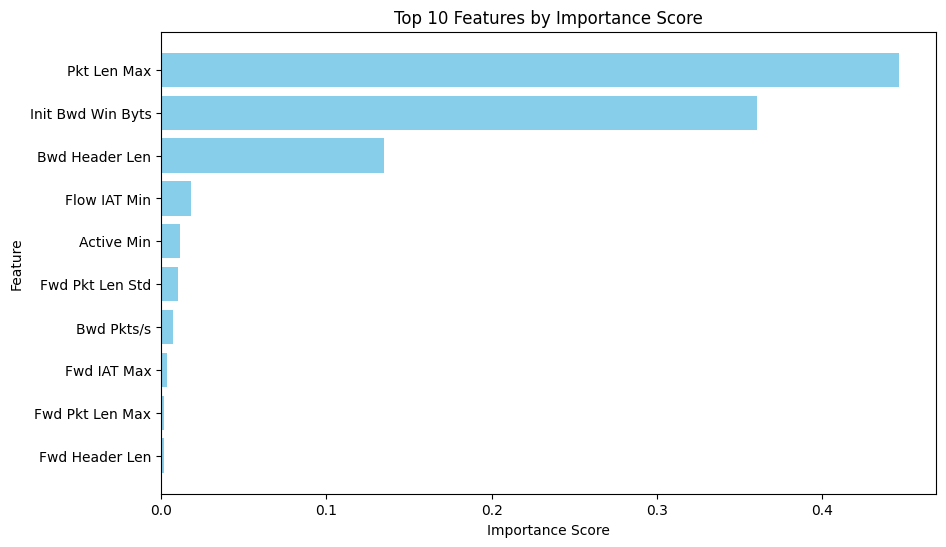

In [16]:
# Step 8: Visualize the Feature Importances
# Plotting the top 10 features with their importance scores
plt.figure(figsize=(10, 6))
plt.barh(top_features_df['Feature'], top_features_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Features by Importance Score')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()

---
# ***Model Training & Evaluation***


In [17]:
# For consistency, re-train & test on dataset with selected top features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]
model.fit(X_train_selected, y_train)
accuracy = model.score(X_test_selected, y_test)
print("Model accuracy with selected features:", accuracy)

Model accuracy with selected features: 0.999764035358394


## ***Experimental (Confusion Matrix & Additional Metrics)***

Planning to add a confusion matrix and metrics like precision, recall, and F1-score to evaluate the model's performance

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     55005
           1       1.00      1.00      1.00     55181

    accuracy                           1.00    110186
   macro avg       1.00      1.00      1.00    110186
weighted avg       1.00      1.00      1.00    110186



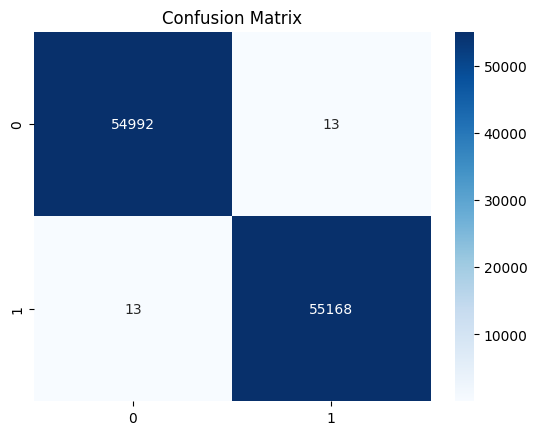

In [18]:
y_pred = model.predict(X_test_selected)
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Export Output